In [17]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Vicon RULA Scores

In [3]:
data = pd.read_csv("../comprehensive_rula_vicon.csv")

In [4]:
data

,Filename,ScoreA,ScoreB,GrandScore,UpperArmAngle,LowerArmAngle,WristAngle,NeckAngle,NeckTwistAngle,TrunkAngle
0,12_03_01_766.json,3,8,3,44.9226,61.79280,-1,124.3890,123.5160,-1
1,12_03_01_783.json,4,8,4,114.1330,3.77756,-1,36.4548,52.4862,-1
2,12_03_01_800.json,4,8,4,0.0000,91.74450,-1,53.5460,87.6967,-1
3,12_03_01_816.json,4,8,4,0.0000,55.37180,-1,55.0766,123.5120,-1
4,12_03_01_833.json,4,8,4,0.0000,52.31590,-1,126.4560,127.5160,-1
...,...,...,...,...,...,...,...,...,...,...
85929,12_26_53_916.json,4,8,4,122.3000,17.40920,-1,87.5475,56.4485,-1
85930,12_26_53_933.json,4,8,4,0.0000,90.00000,-1,143.3350,56.4493,-1
85931,12_26_53_950.json,4,8,4,57.6993,127.72900,-1,53.1662,123.5500,-1
85932,12_26_53_966.json,4,7,6,-1.0000,54.33040,-1,92.4484,-1.0000,-1


## Raw Vicon Data

In [ ]:
sheets = pd.read_excel("../Vicon_Keypoints_Data.xlsx", sheet_name=None)  # Returns a dict of DataFrames

In [29]:
list(sheets.keys())

['Neck',
 'Right Shoulder',
 'Right Elbow',
 'Right Wrist',
 'Left Shoulder',
 'Left Wrist',
 'Mid Hip',
 'Right Hip',
 'Left Hip',
 'Right Ear',
 'Left Ear']

In [30]:
# fix data
sheets['Left Wrist'] = sheets['Left Wrist'].drop(columns='Frame')
sheets['Left Wrist'] = sheets['Left Wrist'].rename(columns={
    'x': 'X',
    'y': 'Y',
    'z': 'Z'
    })

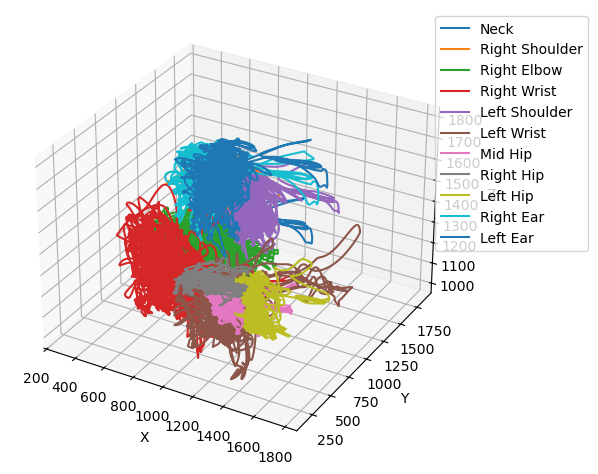

In [34]:
list(sheets.keys())

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each body part
for joint in sheets.keys():

    x = sheets[joint]['X']
    y = sheets[joint]['Y']
    z = sheets[joint]['Z']

    # Plot mean as a dot
    ax.plot(x, y, z, label=joint)

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))  # Move legend outside

plt.tight_layout()
plt.show()

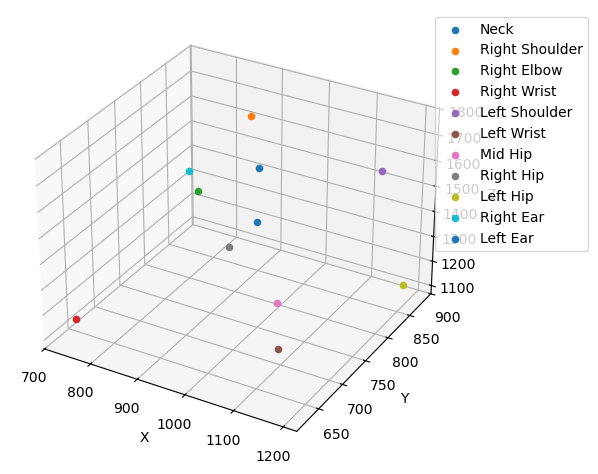

In [33]:
list(sheets.keys())

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each body part
for joint in sheets.keys():

    # Compute mean coordinates
    x_mean = np.mean(sheets[joint]['X'])
    y_mean = np.mean(sheets[joint]['Y'])
    z_mean = np.mean(sheets[joint]['Z'])

    # Plot mean as a dot
    ax.scatter(x_mean, y_mean, z_mean, label=joint)

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))  # Move legend outside

plt.tight_layout()
plt.show()